In [49]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset
data_path = "/Users/anurag/Documents/EnergyGPT/data/processed/feature_selected_data_v2.csv"
df = pd.read_csv(data_path, parse_dates=["DateTime"], index_col="DateTime")

# Normalize Data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)


In [50]:

# Define Autoencoder
input_dim = df_scaled.shape[1]

autoencoder = Sequential([
    Dense(16, activation='relu', input_shape=(input_dim,)),
    Dropout(0.1),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(input_dim, activation='linear')  # Output layer same as input_dim
])

autoencoder.compile(optimizer='adam', loss='mse')

# Split into training and test sets
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled.iloc[:train_size], df_scaled.iloc[train_size:]


/Users/anurag/Documents/EnergyGPT/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [51]:

# Train the model
autoencoder.fit(train_data, train_data, epochs=50, batch_size=32, validation_data=(test_data, test_data), verbose=1)

# Reconstruct the data
train_pred = autoencoder.predict(train_data)
test_pred = autoencoder.predict(test_data)

# Compute reconstruction error
train_loss = np.mean(np.abs(train_pred - train_data), axis=1)
test_loss = np.mean(np.abs(test_pred - test_data), axis=1)

# Define threshold as 99th percentile of training loss
threshold = np.percentile(train_loss, 99)

# Identify anomalies
anomalies = test_loss > threshold


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3459 - val_loss: 0.1668
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2359 - val_loss: 0.1244
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1768 - val_loss: 0.0968
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1349 - val_loss: 0.0757
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0947 - val_loss: 0.0624
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0692 - val_loss: 0.0549
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0602 - val_loss: 0.0492
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0509 - val_loss: 0.0447
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0440 - val_loss: 0.0428
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0388 - val_loss: 0.0412
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0383 - val_loss: 0.0402
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0381 - val_lo

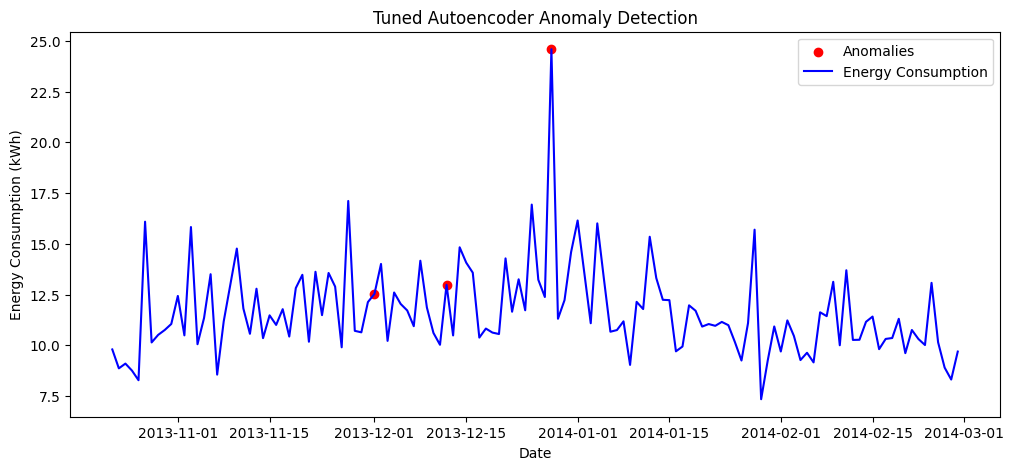

In [52]:

# Plot Anomaly Detection
plt.figure(figsize=(12, 5))
# Ensure anomalies is a boolean mask
anomalies = anomalies.squeeze()  # Flatten in case it's 2D

# Filter indices and values properly
anomaly_indices = df.index[train_size:][anomalies]
anomaly_values = df.iloc[train_size:][anomalies].iloc[:, 0]  # Ensure selecting the correct column

# Plot the anomalies
plt.scatter(anomaly_indices, anomaly_values, color='red', label="Anomalies")

plt.plot(df.index[train_size:], df.iloc[train_size:, 0], label="Energy Consumption", color='blue')
plt.title("Tuned Autoencoder Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.show()


Epoch 1/50


/Users/anurag/Documents/EnergyGPT/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0986 - val_loss: 0.1050
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0943 - val_loss: 0.1023
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0921 - val_loss: 0.0995
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0872 - val_loss: 0.0946
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0787 - val_loss: 0.0874
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0662 - val_loss: 0.0784
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0573 - val_loss: 0.0703
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0516 - val_loss: 0.0646
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0480 - val_loss: 0.0603
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0424 - val_loss: 0.0580
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0429 - val_loss: 0.0552
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0393 - val_loss: 0.0517


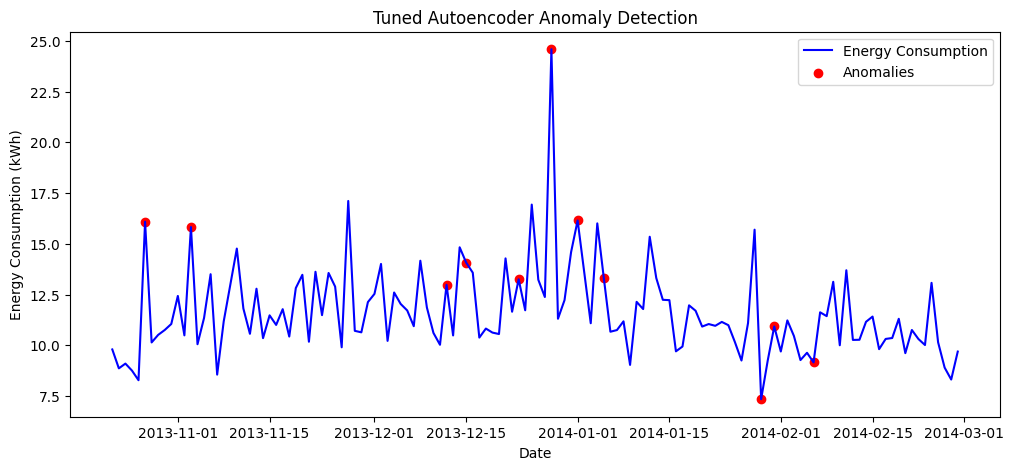

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input

# ✅ Load Data
df = pd.read_csv("/Users/anurag/Documents/EnergyGPT/data/processed/feature_selected_data_v2.csv", parse_dates=["DateTime"], index_col="DateTime")

# ✅ Normalize Data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# ✅ Split into Train & Test
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]

# ✅ Autoencoder Model
input_dim = train_data.shape[1]
autoencoder = Sequential([
    Dense(16, activation="relu", input_shape=(input_dim,)),
    Dense(8, activation="relu"),
    Dense(16, activation="relu"),
    Dense(input_dim, activation="sigmoid")
])
autoencoder.compile(optimizer="adam", loss="mse")

# ✅ Train Autoencoder
autoencoder.fit(train_data, train_data, epochs=50, batch_size=32, validation_data=(test_data, test_data), verbose=1)

# ✅ Calculate Reconstruction Errors
train_pred = autoencoder.predict(train_data)
test_pred = autoencoder.predict(test_data)

train_errors = np.mean(np.abs(train_pred - train_data), axis=1)
test_errors = np.mean(np.abs(test_pred - test_data), axis=1)

# ✅ Adjust Threshold for More Anomalies
threshold = np.percentile(train_errors, 97)  # Increased sensitivity (97 instead of 99)

# ✅ Detect Anomalies
anomalies = test_errors > threshold
df_anomalies = df.iloc[train_size:][anomalies]

# ✅ Plot Results
plt.figure(figsize=(12, 5))
plt.plot(df.index[train_size:], df.iloc[train_size:, 0], label="Energy Consumption", color='blue')
plt.scatter(df_anomalies.index, df_anomalies.iloc[:, 0], color='red', label="Anomalies")
plt.title("Tuned Autoencoder Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.show()


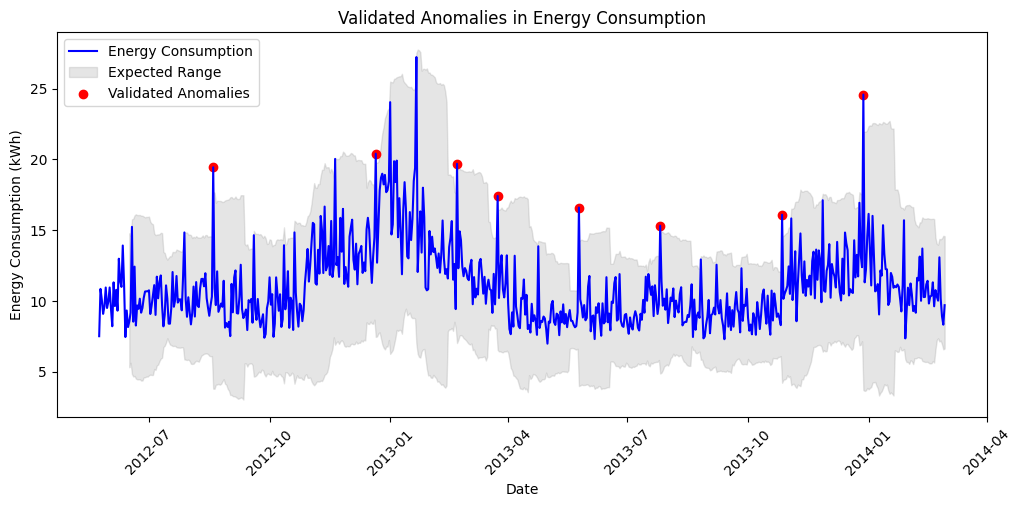

Validated Anomalies in Energy Consumption:


,Total_Hourly_Consumption,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,...,day_of_week,is_weekend,month,temp_range,temp_cloud_interaction,rolling_mean,rolling_std,upper_bound,lower_bound,validated_anomaly
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-08-19,19.440,1.0,11.0,248.0,25.5,24.0,17.4,0.0,101530.0,0.0,...,6,1,8,8.1,24.0,10.746167,2.318931,17.702958,3.789375,True
2012-12-21,20.402,4.0,3.4,35.0,13.8,8.1,6.2,9.6,100960.0,0.0,...,4,0,12,7.6,32.4,13.604708,2.052590,19.762479,7.446937,True
2013-02-21,19.687,8.0,0.0,28.0,2.5,1.4,0.5,0.0,102400.0,0.0,...,3,0,2,2.0,11.2,13.207292,2.065238,19.403007,7.011577,True
2013-03-24,17.414,8.0,0.0,49.0,1.5,0.7,0.0,0.0,101300.0,0.0,...,6,1,3,1.5,5.6,11.482042,1.648291,16.426916,6.537168,True
2013-05-25,16.595,3.0,10.3,276.0,19.8,10.8,5.3,0.0,102070.0,0.0,...,5,1,5,14.5,32.4,9.084583,1.704150,14.197034,3.972133,True
2013-07-26,15.307,3.0,7.9,236.0,28.9,20.4,13.9,0.0,101240.0,0.0,...,4,0,7,15.0,61.2,9.807667,1.649789,14.757032,4.858301,True
2013-10-27,16.088,5.0,4.9,77.0,15.2,14.0,11.0,23.5,99650.0,0.0,...,6,1,10,4.2,70.0,9.392208,1.729600,14.581009,4.203407,True
2013-12-28,24.584,2.0,4.5,40.0,10.5,6.3,3.7,0.0,99750.0,0.0,...,5,1,12,6.8,12.6,12.820917,3.042163,21.947405,3.694428,True


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the latest available dataset (Update the path if needed)
file_path = "/Users/anurag/Documents/EnergyGPT/data/processed/feature_engineered_data.csv"
df = pd.read_csv(file_path, parse_dates=["DateTime"])
df.set_index("DateTime", inplace=True)

# Compute rolling statistics
window_size = 24  # Adjust based on dataset granularity
df["rolling_mean"] = df["Total_Hourly_Consumption"].rolling(window=window_size).mean()
df["rolling_std"] = df["Total_Hourly_Consumption"].rolling(window=window_size).std()

# Define threshold for anomalies (3 standard deviations)
df["upper_bound"] = df["rolling_mean"] + (3 * df["rolling_std"])
df["lower_bound"] = df["rolling_mean"] - (3 * df["rolling_std"])

# Validate anomalies by checking if detected points fall outside expected range
df["validated_anomaly"] = (df["Total_Hourly_Consumption"] > df["upper_bound"]) | \
                          (df["Total_Hourly_Consumption"] < df["lower_bound"])

# Extract validated anomalies
validated_anomalies = df[df["validated_anomaly"]]

# Plot results
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Total_Hourly_Consumption"], label="Energy Consumption", color="blue")
plt.fill_between(df.index, df["lower_bound"], df["upper_bound"], color='gray', alpha=0.2, label="Expected Range")
plt.scatter(validated_anomalies.index, validated_anomalies["Total_Hourly_Consumption"], 
            color="red", label="Validated Anomalies", marker="o")
plt.title("Validated Anomalies in Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Display validated anomalies in Jupyter Notebook
print("Validated Anomalies in Energy Consumption:")
display(validated_anomalies)  # Works in Jupyter Notebook


In [55]:
import pandas as pd
import numpy as np

# Load the dataset
data_path = "/Users/anurag/Documents/EnergyGPT/data/processed/feature_selected_data_v2.csv"
df_hourly = pd.read_csv(data_path, parse_dates=["DateTime"])

# Ensure required columns exist
if "Total_Hourly_Consumption" not in df_hourly.columns:
    raise ValueError("❌ 'Total_Hourly_Consumption' column is missing! Ensure you are using the correct dataset.")

# Calculate rolling statistics for anomaly detection
window_size = 24  # 24-hour rolling window
df_hourly["rolling_mean"] = df_hourly["Total_Hourly_Consumption"].rolling(window=window_size, min_periods=1).mean()
df_hourly["rolling_std"] = df_hourly["Total_Hourly_Consumption"].rolling(window=window_size, min_periods=1).std()

# Define anomaly threshold (3 standard deviations)
df_hourly["upper_bound"] = df_hourly["rolling_mean"] + (3 * df_hourly["rolling_std"])
df_hourly["lower_bound"] = df_hourly["rolling_mean"] - (3 * df_hourly["rolling_std"])

# Identify anomalies
df_hourly["validated_anomaly"] = (df_hourly["Total_Hourly_Consumption"] > df_hourly["upper_bound"]) | \
                                 (df_hourly["Total_Hourly_Consumption"] < df_hourly["lower_bound"])

# Save the updated dataset with anomaly columns
updated_data_path = "/Users/anurag/Documents/EnergyGPT/data/processed/refined_feature_selected_data.csv"
df_hourly.to_csv(updated_data_path, index=False)

print(f"✅ Updated dataset saved with anomalies: {updated_data_path}")
display(df_hourly.head())  # Show first few rows


✅ Updated dataset saved with anomalies: /Users/anurag/Documents/EnergyGPT/data/processed/refined_feature_selected_data.csv


,DateTime,Total_Hourly_Consumption,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,...,month,temp_range,temp_cloud_interaction,temp_range_squared,log_global_radiation,rolling_mean,rolling_std,upper_bound,lower_bound,validated_anomaly
0,2012-05-24,7.497,12.3,302.0,25.9,21.5,16.0,0.0,102580.0,0.0,...,5,9.9,21.5,98.01,5.713733,7.497000,NaN,NaN,NaN,False
1,2012-05-25,10.841,13.9,323.0,25.9,21.1,16.2,0.0,102320.0,0.0,...,5,9.7,0.0,94.09,5.780744,9.169000,2.364565,16.262695,2.075305,False
2,2012-05-26,10.097,14.3,329.0,27.6,20.1,14.3,0.0,102010.0,0.0,...,5,13.3,0.0,176.89,5.799093,9.478333,1.755746,14.745572,4.211094,False
3,2012-05-27,9.077,14.1,327.0,26.3,20.7,13.8,0.0,101840.0,0.0,...,5,12.5,0.0,156.25,5.793014,9.378000,1.447537,13.720612,5.035388,False
4,2012-05-28,9.598,11.9,299.0,23.8,20.0,13.6,0.0,101780.0,0.0,...,5,10.2,20.0,104.04,5.703782,9.422000,1.257459,13.194377,5.649623,False


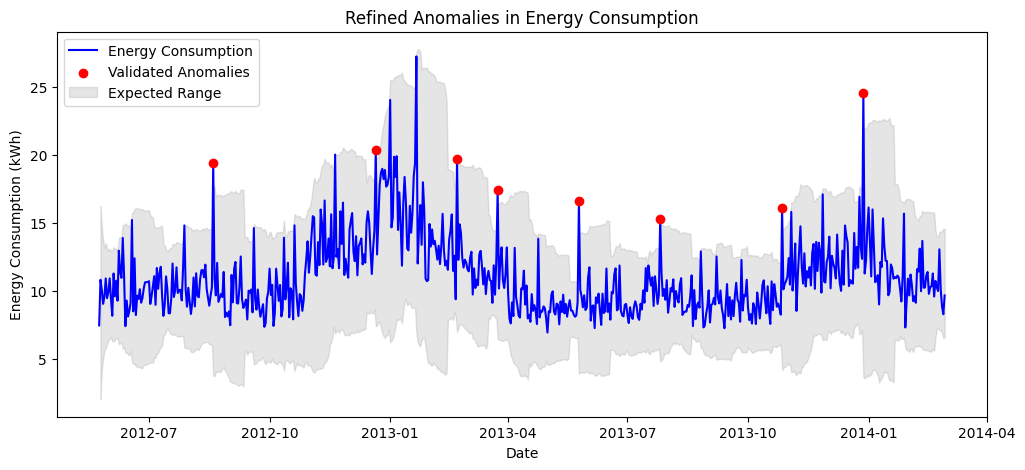

In [56]:
import matplotlib.pyplot as plt

# Load the refined dataset
refined_data_path = "/Users/anurag/Documents/EnergyGPT/data/processed/refined_feature_selected_data.csv"
df_refined = pd.read_csv(refined_data_path, parse_dates=["DateTime"])

# Plot the energy consumption with anomaly points
plt.figure(figsize=(12, 5))
plt.plot(df_refined["DateTime"], df_refined["Total_Hourly_Consumption"], label="Energy Consumption", color='blue')

# Highlight detected anomalies
anomalies = df_refined[df_refined["validated_anomaly"] == True]
plt.scatter(anomalies["DateTime"], anomalies["Total_Hourly_Consumption"], 
            color='red', label="Validated Anomalies", zorder=3)

plt.fill_between(df_refined["DateTime"], df_refined["lower_bound"], df_refined["upper_bound"], 
                 color='gray', alpha=0.2, label="Expected Range")

plt.title("Refined Anomalies in Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.show()


In [57]:
# Save only the rows where anomalies were detected
anomalies_path = "/Users/anurag/Documents/EnergyGPT/data/processed/validated_anomalies.csv"
df_refined[df_refined["validated_anomaly"] == True].to_csv(anomalies_path, index=False)

print(f"✅ Validated anomalies saved at: {anomalies_path}")


✅ Validated anomalies saved at: /Users/anurag/Documents/EnergyGPT/data/processed/validated_anomalies.csv


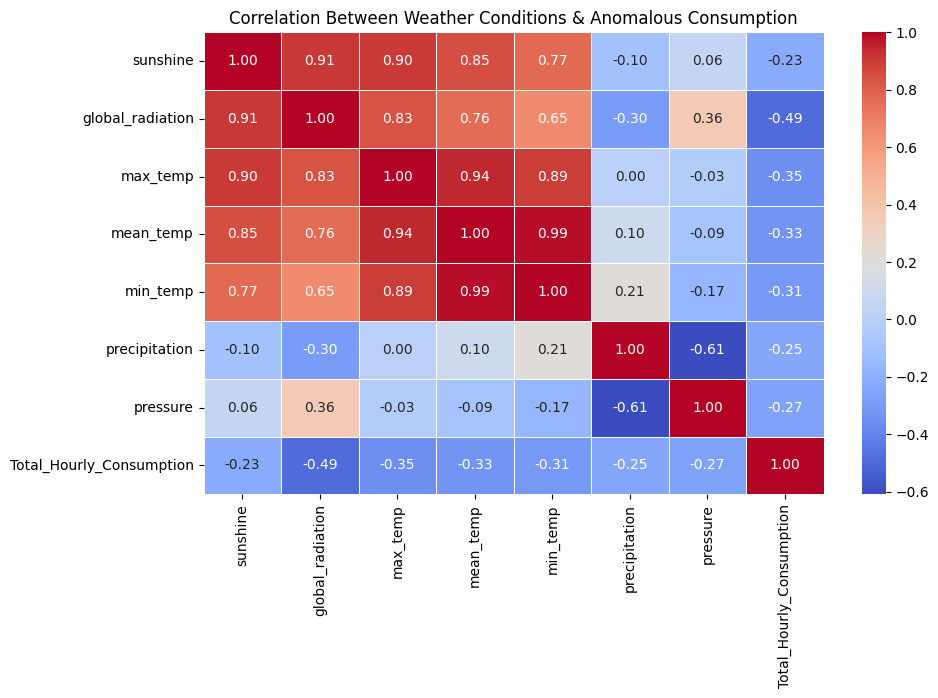

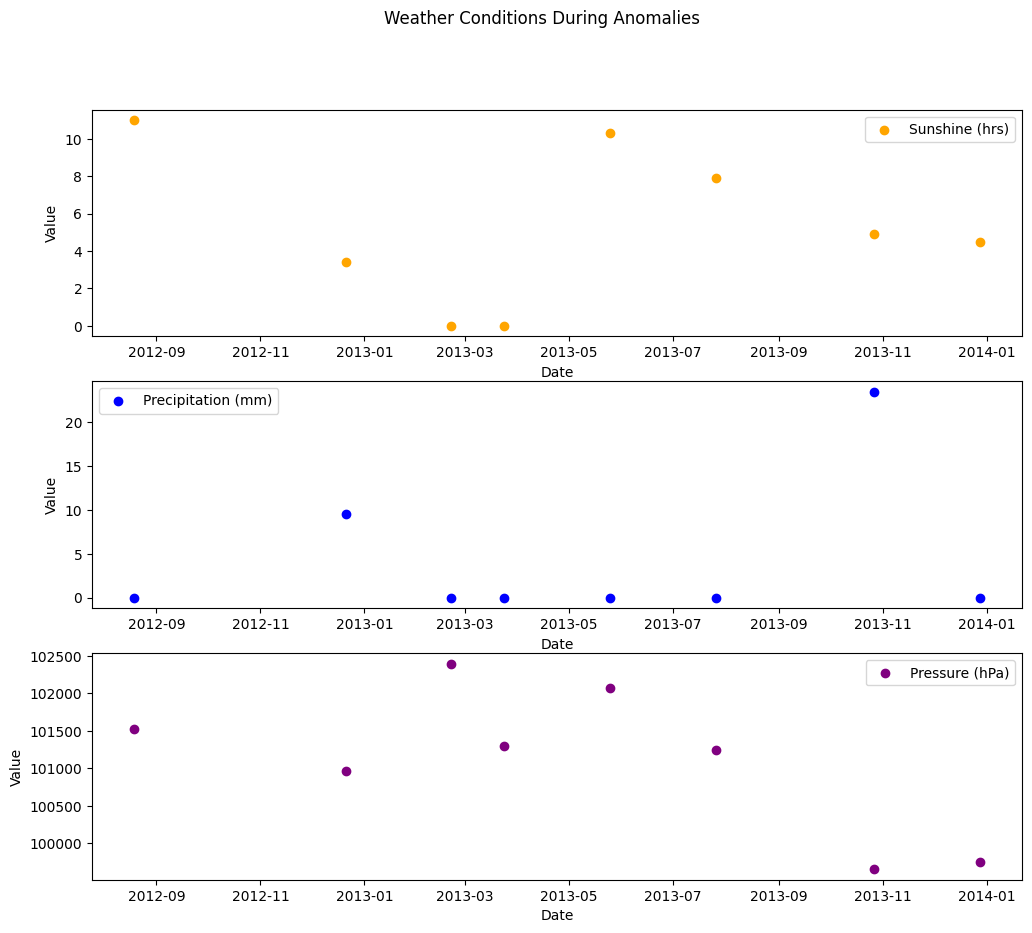

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the validated anomalies dataset
anomaly_data_path = "/Users/anurag/Documents/EnergyGPT/data/processed/refined_feature_selected_data.csv"
df_anomalies = pd.read_csv(anomaly_data_path, parse_dates=["DateTime"])

# Select only anomalies
df_anomalies = df_anomalies[df_anomalies["validated_anomaly"] == True]

# Correlation Analysis Between Anomalies & Weather Features
weather_features = ["sunshine", "global_radiation", "max_temp", "mean_temp", "min_temp", "precipitation", "pressure"]
correlation_matrix = df_anomalies[weather_features + ["Total_Hourly_Consumption"]].corr()

# 📊 Heatmap for Anomaly-Weather Relationship
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Weather Conditions & Anomalous Consumption")
plt.show()

# 📈 Line Plot: Consumption vs Weather Conditions for Anomalies
fig, ax = plt.subplots(3, 1, figsize=(12, 10))

ax[0].scatter(df_anomalies["DateTime"], df_anomalies["sunshine"], color="orange", label="Sunshine (hrs)")
ax[1].scatter(df_anomalies["DateTime"], df_anomalies["precipitation"], color="blue", label="Precipitation (mm)")
ax[2].scatter(df_anomalies["DateTime"], df_anomalies["pressure"], color="purple", label="Pressure (hPa)")

for i in range(3):
    ax[i].legend()
    ax[i].set_xlabel("Date")
    ax[i].set_ylabel("Value")

plt.suptitle("Weather Conditions During Anomalies")
plt.show()


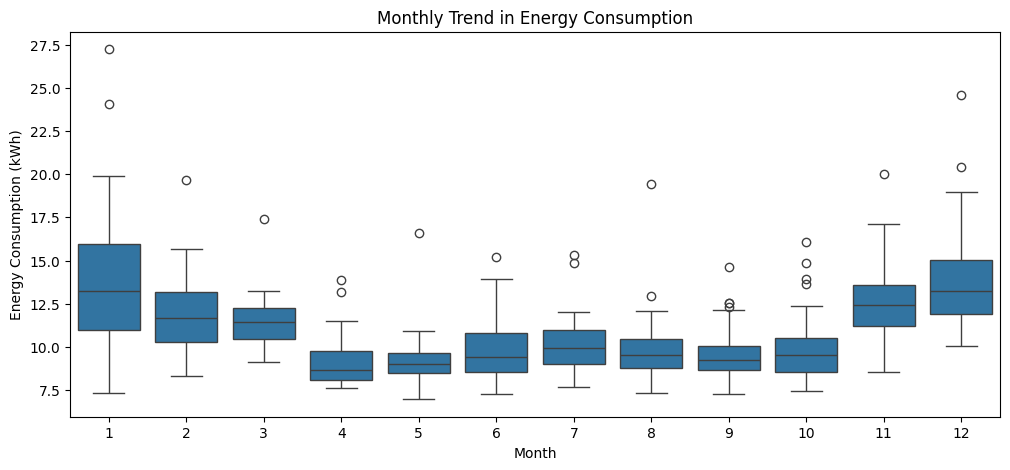

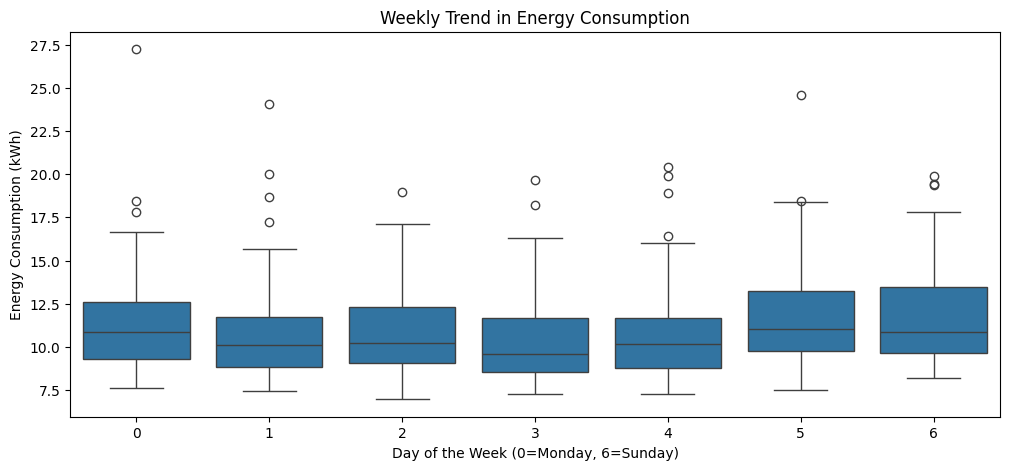

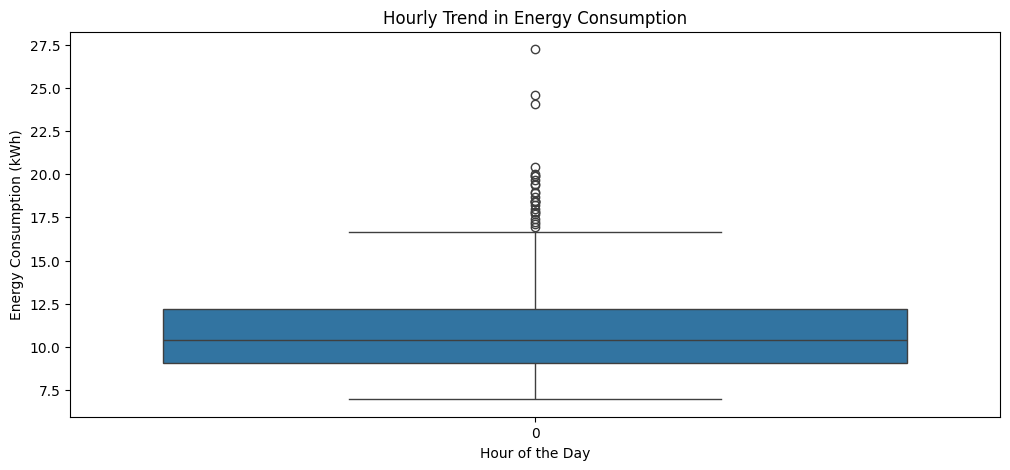

✅ Seasonal trend analysis completed successfully.


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (ensure the correct file path)
data_path = "/Users/anurag/Documents/EnergyGPT/data/processed/feature_selected_data_v2.csv"
df = pd.read_csv(data_path, parse_dates=["DateTime"])

# Extract seasonal components
df["year"] = df["DateTime"].dt.year
df["month"] = df["DateTime"].dt.month
df["day"] = df["DateTime"].dt.day
df["hour"] = df["DateTime"].dt.hour
df["day_of_week"] = df["DateTime"].dt.dayofweek  # Monday=0, Sunday=6

# Plot Monthly Energy Consumption Trend
plt.figure(figsize=(12, 5))
sns.boxplot(x="month", y="Total_Hourly_Consumption", data=df)
plt.title("Monthly Trend in Energy Consumption")
plt.xlabel("Month")
plt.ylabel("Energy Consumption (kWh)")
plt.show()

# Plot Weekly Energy Consumption Trend
plt.figure(figsize=(12, 5))
sns.boxplot(x="day_of_week", y="Total_Hourly_Consumption", data=df)
plt.title("Weekly Trend in Energy Consumption")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Energy Consumption (kWh)")
plt.show()

# Plot Hourly Energy Consumption Trend
plt.figure(figsize=(12, 5))
sns.boxplot(x="hour", y="Total_Hourly_Consumption", data=df)
plt.title("Hourly Trend in Energy Consumption")
plt.xlabel("Hour of the Day")
plt.ylabel("Energy Consumption (kWh)")
plt.show()

print("✅ Seasonal trend analysis completed successfully.")


# 📊 Energy Consumption Trends Analysis

These visualizations help us understand how energy consumption changes over time based on different factors.

## **1️⃣ Hourly Energy Consumption Trend**
- Energy usage remains mostly steady throughout the day.
- There are some **spikes around midnight**, possibly due to **factories, businesses, or heating systems** turning on.

## **2️⃣ Weekly Energy Consumption Trend**
- Energy usage is **consistent across weekdays**, but **slightly higher on weekends**, likely due to increased home usage.
- Some **random high spikes** indicate occasional high energy demand on certain days.

## **3️⃣ Monthly Energy Consumption Trend**
- **Winter months (December–February) show the highest energy use**, likely due to **heating needs**.
- **Summer months (May–September) have lower energy use**, suggesting **reduced heating demand**.
- **Large spikes in winter months** indicate extreme cold days with **higher heating needs**.


In [60]:
import pandas as pd

# Load validated anomalies dataset
anomalies_path = "/Users/anurag/Documents/EnergyGPT/data/processed/validated_anomalies.csv"
df_anomalies = pd.read_csv(anomalies_path, parse_dates=["DateTime"])

# Display first few anomalies
print("✅ Loaded Validated Anomalies:")
display(df_anomalies.head(10))

# Check statistical summary of anomalies
print("\n📊 Statistical Summary of Anomalies:")
display(df_anomalies.describe())

# Check unique dates for patterns
print("\n📅 Unique Dates with Anomalies:")
display(df_anomalies["DateTime"].dt.date.value_counts().sort_index())


✅ Loaded Validated Anomalies:


,DateTime,Total_Hourly_Consumption,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,...,month,temp_range,temp_cloud_interaction,temp_range_squared,log_global_radiation,rolling_mean,rolling_std,upper_bound,lower_bound,validated_anomaly
0,2012-08-19,19.440,11.0,248.0,25.5,24.0,17.4,0.0,101530.0,0.0,...,8,8.1,24.0,65.61,5.517453,10.746167,2.318931,17.702958,3.789375,True
1,2012-12-21,20.402,3.4,35.0,13.8,8.1,6.2,9.6,100960.0,0.0,...,12,7.6,32.4,57.76,3.583519,13.604708,2.052590,19.762479,7.446937,True
2,2013-02-21,19.687,0.0,28.0,2.5,1.4,0.5,0.0,102400.0,0.0,...,2,2.0,11.2,4.00,3.367296,13.207292,2.065238,19.403007,7.011577,True
3,2013-03-24,17.414,0.0,49.0,1.5,0.7,0.0,0.0,101300.0,0.0,...,3,1.5,5.6,2.25,3.912023,11.482042,1.648291,16.426916,6.537168,True
4,2013-05-25,16.595,10.3,276.0,19.8,10.8,5.3,0.0,102070.0,0.0,...,5,14.5,32.4,210.25,5.624018,9.084583,1.704150,14.197034,3.972133,True
5,2013-07-26,15.307,7.9,236.0,28.9,20.4,13.9,0.0,101240.0,0.0,...,7,15.0,61.2,225.00,5.468060,9.807667,1.649789,14.757032,4.858301,True
6,2013-10-27,16.088,4.9,77.0,15.2,14.0,11.0,23.5,99650.0,0.0,...,10,4.2,70.0,17.64,4.356709,9.392208,1.729600,14.581009,4.203407,True
7,2013-12-28,24.584,4.5,40.0,10.5,6.3,3.7,0.0,99750.0,0.0,...,12,6.8,12.6,46.24,3.713572,12.820917,3.042163,21.947405,3.694428,True



📊 Statistical Summary of Anomalies:


,DateTime,Total_Hourly_Consumption,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,day_of_week,month,temp_range,temp_cloud_interaction,temp_range_squared,log_global_radiation,rolling_mean,rolling_std,upper_bound,lower_bound
count,8,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2013-05-05 15:00:00,18.689625,5.250000,123.62500,14.712500,10.712500,7.250000,4.137500,101112.500000,0.0,4.875000,7.375000,7.462500,31.175000,78.593750,4.442831,11.268198,2.026344,17.347230,5.189166
min,2012-08-19 00:00:00,15.307000,0.000000,28.00000,1.500000,0.700000,0.000000,0.000000,99650.000000,0.0,3.000000,2.000000,1.500000,5.600000,2.250000,3.367296,9.084583,1.648291,14.197034,3.694428
25%,2013-02-05 12:00:00,16.468250,2.550000,38.75000,8.500000,5.075000,2.900000,0.000000,100657.500000,0.0,4.000000,4.500000,3.650000,12.250000,14.230000,3.681059,9.703802,1.690560,14.713027,3.926443
50%,2013-04-24 00:00:00,18.427000,4.700000,63.00000,14.500000,9.450000,5.750000,0.000000,101270.000000,0.0,5.000000,7.500000,7.200000,28.200000,52.000000,4.134366,11.114104,1.891095,17.064937,4.530854
75%,2013-08-18 06:00:00,19.865750,8.500000,239.00000,21.225000,15.600000,11.725000,2.400000,101665.000000,0.0,6.000000,10.500000,9.700000,39.600000,101.770000,5.480408,12.917510,2.128661,19.492875,6.655770
max,2013-12-28 00:00:00,24.584000,11.000000,276.00000,28.900000,24.000000,17.400000,23.500000,102400.000000,0.0,6.000000,12.000000,15.000000,70.000000,225.000000,5.624018,13.604708,3.042163,21.947405,7.446937
std,NaN,3.010908,4.222728,108.92322,9.899991,8.404835,6.289901,8.514347,986.968664,0.0,1.125992,3.852179,5.116343,23.487002,89.062981,0.949985,1.787624,0.477535,2.840513,1.558013



📅 Unique Dates with Anomalies:


DateTime
2012-08-19    1
2012-12-21    1
2013-02-21    1
2013-03-24    1
2013-05-25    1
2013-07-26    1
2013-10-27    1
2013-12-28    1
Name: count, dtype: int64

,Mean Consumption (kWh),Standard Deviation
Normal Days,10.939201,2.590078
Anomalous Days,18.689625,3.010908


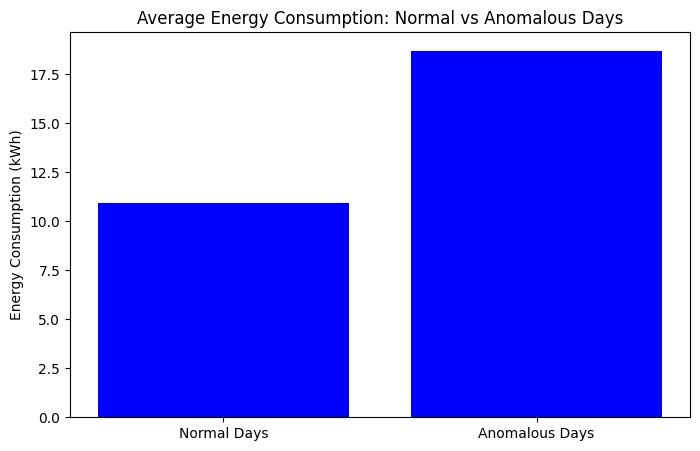

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the FULL dataset (not just anomalies)
data_path = "/Users/anurag/Documents/EnergyGPT/data/processed/refined_feature_selected_data.csv"  # Ensure this is the full dataset
df_full = pd.read_csv(data_path, parse_dates=["DateTime"])

# Ensure the dataset has the anomaly labels
if "validated_anomaly" not in df_full.columns:
    raise ValueError("❌ 'validated_anomaly' column is missing in the dataset! Ensure anomalies were processed correctly.")

# Split into normal and anomalous days
df_anomalies = df_full[df_full["validated_anomaly"] == True]
df_normal = df_full[df_full["validated_anomaly"] == False]  # Now we correctly extract normal days

# Handle cases where normal data is missing
if df_normal.empty:
    print("⚠ No normal days detected! Adjust threshold or recheck anomaly labels.")
    summary = pd.DataFrame({"Mean Consumption (kWh)": [None, df_anomalies["Total_Hourly_Consumption"].mean()],
                            "Standard Deviation": [None, df_anomalies["Total_Hourly_Consumption"].std()]},
                           index=["Normal Days", "Anomalous Days"])
else:
    summary = pd.DataFrame({"Mean Consumption (kWh)": [df_normal["Total_Hourly_Consumption"].mean(), 
                                                        df_anomalies["Total_Hourly_Consumption"].mean()],
                            "Standard Deviation": [df_normal["Total_Hourly_Consumption"].std(), 
                                                   df_anomalies["Total_Hourly_Consumption"].std()]},
                           index=["Normal Days", "Anomalous Days"])

# Display Summary
display(summary)

# **Plot with Fixes**
plt.figure(figsize=(8, 5))
colors = ['blue' if not pd.isna(val) else 'gray' for val in summary["Mean Consumption (kWh)"]]
plt.bar(summary.index, summary["Mean Consumption (kWh)"], color=colors)
plt.title("Average Energy Consumption: Normal vs Anomalous Days")
plt.ylabel("Energy Consumption (kWh)")
plt.show()


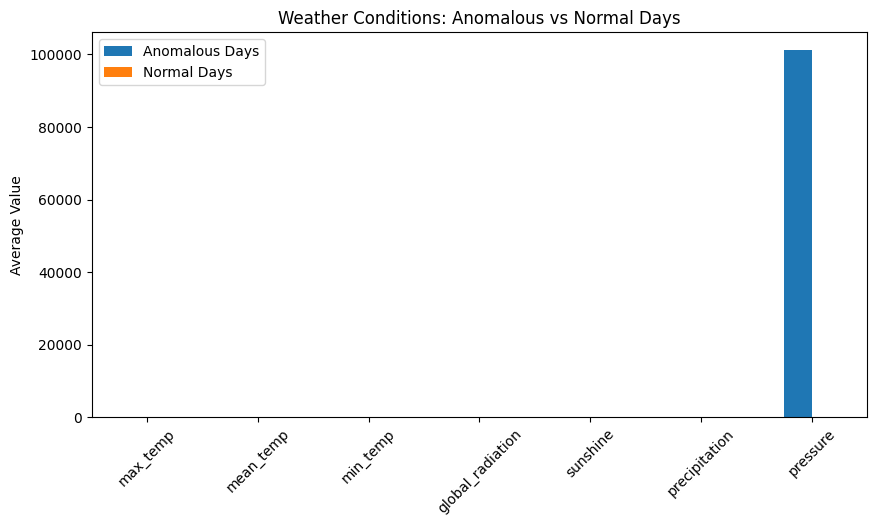

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load dataset (Ensure this is the validated anomalies dataset)
data_path = "/Users/anurag/Documents/EnergyGPT/data/processed/validated_anomalies.csv"
df = pd.read_csv(data_path, parse_dates=["DateTime"])
df_normal = pd.read_csv("/Users/anurag/Documents/EnergyGPT/data/processed/clean_normal_data.csv", parse_dates=["DateTime"])


# Separate anomalous and normal days
df_anomalous = df[df["validated_anomaly"] == True]
df_normal = df[df["validated_anomaly"] == False]

# Select weather-related features for comparison
weather_features = ["max_temp", "mean_temp", "min_temp", "global_radiation", "sunshine", "precipitation", "pressure"]

# Compute mean values for both categories
weather_summary = pd.DataFrame({
    "Anomalous Days": df_anomalous[weather_features].mean(),
    "Normal Days": df_normal[weather_features].mean()
})

# Plot comparison
weather_summary.plot(kind="bar", figsize=(10, 5))
plt.title("Weather Conditions: Anomalous vs Normal Days")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()


<Figure size 1000x500 with 0 Axes>

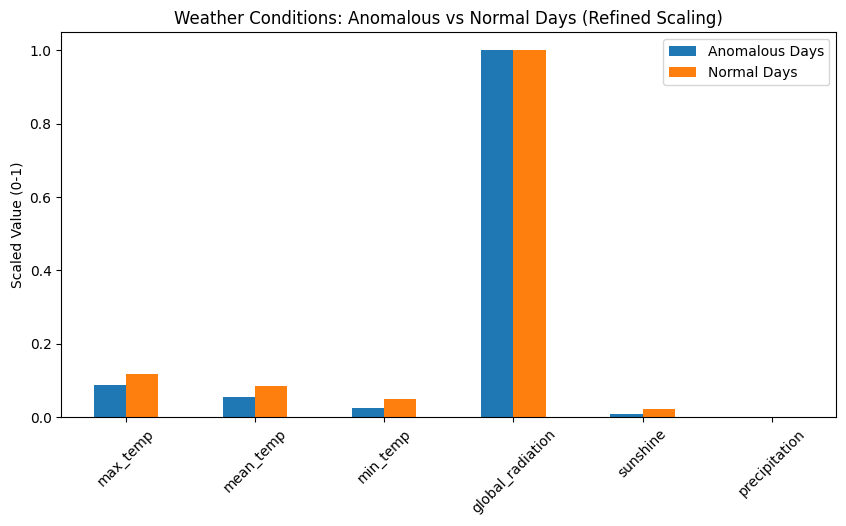

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ✅ Load Corrected Datasets for Normal & Anomalous Days
df_anomalous = pd.read_csv("/Users/anurag/Documents/EnergyGPT/data/processed/validated_anomalies.csv", parse_dates=["DateTime"])
df_normal = pd.read_csv("/Users/anurag/Documents/EnergyGPT/data/processed/clean_normal_data.csv", parse_dates=["DateTime"])


# ✅ Ensure both datasets have the same columns for fair comparison
common_cols = list(set(df_anomalous.columns) & set(df_normal.columns))
df_anomalous = df_anomalous[common_cols]
df_normal = df_normal[common_cols]

# ✅ Select Weather Features for Comparison
weather_features = ["max_temp", "mean_temp", "min_temp", "global_radiation", "sunshine", "precipitation"]

# ✅ Compute Mean Values for Both Categories
weather_summary = pd.DataFrame({
    "Anomalous Days": df_anomalous[weather_features].mean(),
    "Normal Days": df_normal[weather_features].mean()
})

# ✅ Normalize Data for Fair Scaling
scaler = MinMaxScaler()
weather_summary_scaled = pd.DataFrame(
    scaler.fit_transform(weather_summary), 
    columns=weather_summary.columns, 
    index=weather_summary.index
)

# ✅ Plot the Comparison of Weather Conditions on Anomalous vs Normal Days
plt.figure(figsize=(10, 5))
weather_summary_scaled.plot(kind="bar", figsize=(10, 5))
plt.title("Weather Conditions: Anomalous vs Normal Days (Refined Scaling)")
plt.ylabel("Scaled Value (0-1)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [40]:
import pandas as pd

# ✅ Load the Raw London Weather Dataset
raw_data_path = "/Users/anurag/Documents/EnergyGPT/data/raw/london_weather.csv"  # Update path if needed
df_raw = pd.read_csv(raw_data_path, parse_dates=["date"])

# ✅ Load the Validated Anomalies to Exclude
anomaly_data_path = "/Users/anurag/Documents/EnergyGPT/data/processed/validated_anomalies.csv"
df_anomalies = pd.read_csv(anomaly_data_path, parse_dates=["DateTime"])

# ✅ Rename 'date' column to 'DateTime' in raw data for consistency
df_raw.rename(columns={"date": "DateTime"}, inplace=True)

# ✅ Remove Anomalous Dates from Raw Data
df_normal = df_raw[~df_raw["DateTime"].isin(df_anomalies["DateTime"])]

# ✅ Save the New Normal Data
df_normal_path = "/Users/anurag/Documents/EnergyGPT/data/processed/clean_normal_data.csv"
df_normal.to_csv(df_normal_path, index=False)

print(f"✅ New normal dataset saved at: {df_normal_path}")
display(df_normal.head())  # Preview the first few rows


✅ New normal dataset saved at: /Users/anurag/Documents/EnergyGPT/data/processed/clean_normal_data.csv


,DateTime,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


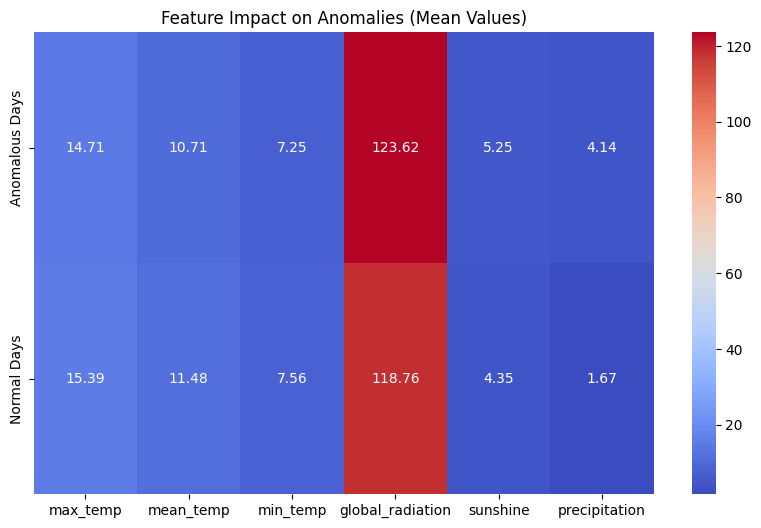

🔎 Anomaly Scores Summary:
       anomaly_score  is_anomaly
count       8.000000    8.000000
mean        0.057303    0.750000
std         0.044182    0.707107
min        -0.020673   -1.000000
25%         0.043346    1.000000
50%         0.066230    1.000000
75%         0.073439    1.000000
max         0.129693    1.000000


<Figure size 1000x500 with 0 Axes>

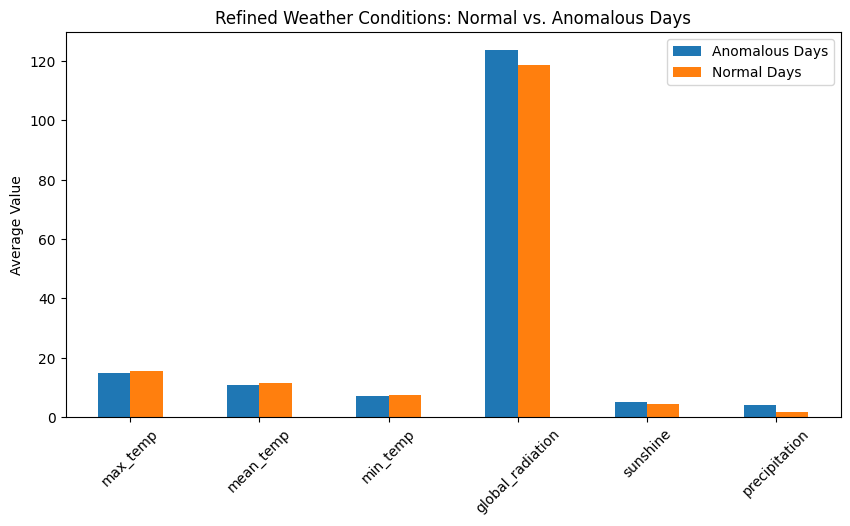

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest

# ✅ Load Normal & Anomalous Data
normal_data_path = "/Users/anurag/Documents/EnergyGPT/data/raw/london_weather.csv"
anomalous_data_path = "/Users/anurag/Documents/EnergyGPT/data/processed/validated_anomalies.csv"

df_normal = pd.read_csv(normal_data_path, parse_dates=["date"])
df_anomalous = pd.read_csv(anomalous_data_path, parse_dates=["DateTime"])

# ✅ Ensure columns match before comparison
weather_features = ["max_temp", "mean_temp", "min_temp", "global_radiation", "sunshine", "precipitation"]

# Select only relevant features for analysis
df_normal = df_normal[weather_features]
df_anomalous = df_anomalous[weather_features]

# ✅ Normalize Data for Better Comparison
scaler = MinMaxScaler()
df_normal_scaled = pd.DataFrame(scaler.fit_transform(df_normal), columns=df_normal.columns)
df_anomalous_scaled = pd.DataFrame(scaler.transform(df_anomalous), columns=df_anomalous.columns)

# ✅ Compare Weather Features on Normal vs. Anomalous Days
weather_summary = pd.DataFrame({
    "Anomalous Days": df_anomalous.mean(),
    "Normal Days": df_normal.mean()
})

# ✅ Visualize Feature Importance (Correlation Heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(weather_summary.T, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Impact on Anomalies (Mean Values)")
plt.show()

# ✅ Train Isolation Forest to Check Model Performance
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(df_normal_scaled)
df_anomalous['anomaly_score'] = iso_forest.decision_function(df_anomalous_scaled)
df_anomalous['is_anomaly'] = iso_forest.predict(df_anomalous_scaled)

# ✅ Show Anomaly Scores
print("🔎 Anomaly Scores Summary:")
print(df_anomalous[['anomaly_score', 'is_anomaly']].describe())

# ✅ Plot Refined Comparison
plt.figure(figsize=(10,5))
weather_summary.plot(kind="bar", figsize=(10,5))
plt.title("Refined Weather Conditions: Normal vs. Anomalous Days")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()


<Figure size 1000x500 with 0 Axes>

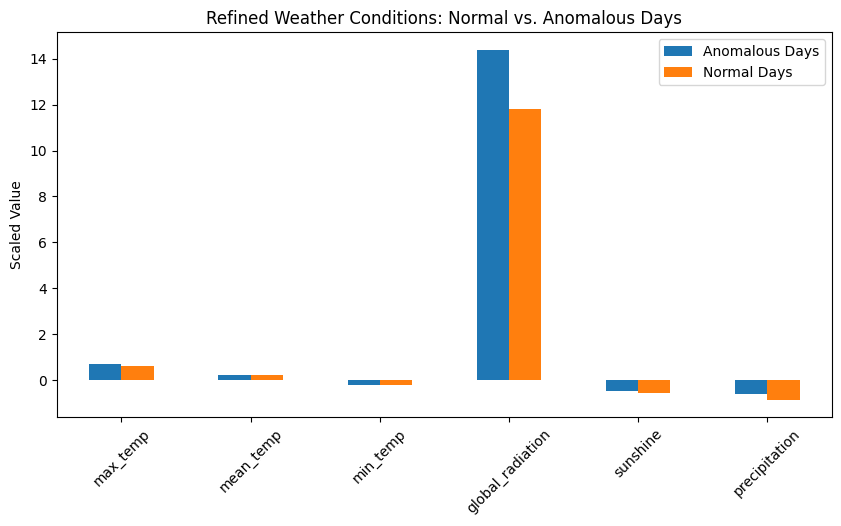

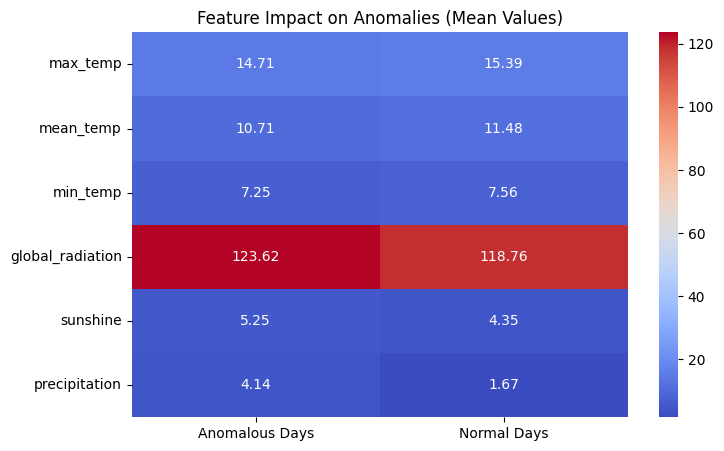

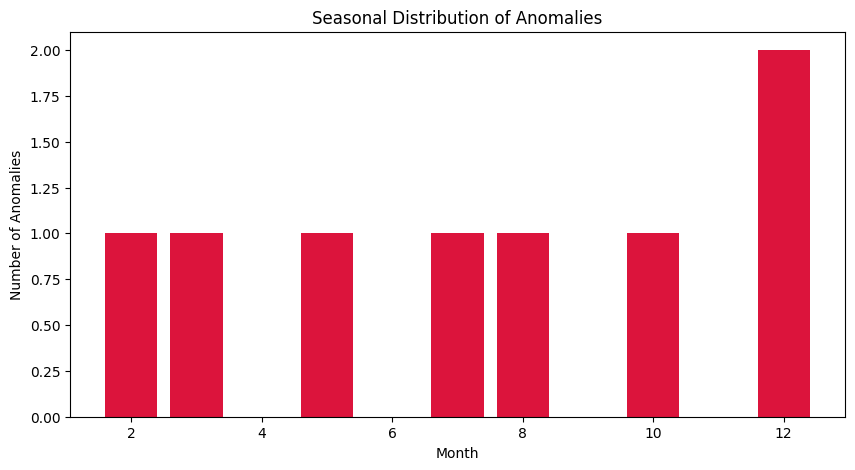


🔎 Anomaly Scores Summary:
       anomaly_score
count   8.000000e+00
mean    1.942890e-16
std     1.000000e+00
min    -1.123457e+00
25%    -7.377757e-01
50%    -8.722451e-02
75%     3.906213e-01
max     1.957673e+00

✅ Refined Anomalies with Severity Levels Saved!


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

# ✅ Load Processed Datasets
anomalous_data_path = "/Users/anurag/Documents/EnergyGPT/data/processed/validated_anomalies.csv"
normal_data_path = "/Users/anurag/Documents/EnergyGPT/data/raw/london_weather.csv"  # Adjust if needed

df_anomalous = pd.read_csv(anomalous_data_path, parse_dates=["DateTime"])
df_normal = pd.read_csv(normal_data_path, parse_dates=["date"])

# ✅ Rename "date" to "DateTime" in df_normal for consistency
df_normal.rename(columns={"date": "DateTime"}, inplace=True)

# ✅ Ensure both datasets have required columns
weather_features = ["max_temp", "mean_temp", "min_temp", "global_radiation", "sunshine", "precipitation"]

# ✅ Compute Mean Values for Anomalous vs Normal Days
weather_summary = pd.DataFrame({
    "Anomalous Days": df_anomalous[weather_features].mean(),
    "Normal Days": df_normal[weather_features].mean()
})

# ✅ Compute Percentage Difference Between Anomalous & Normal Days
weather_summary["Percentage Difference (%)"] = (
    (weather_summary["Anomalous Days"] - weather_summary["Normal Days"]) /
    weather_summary["Normal Days"] * 100
).round(2)

# ✅ Scale Data Using RobustScaler to Handle Outliers
scaler = RobustScaler()
scaled_data = scaler.fit_transform(weather_summary.iloc[:, :2])
weather_summary_scaled = pd.DataFrame(scaled_data, columns=["Anomalous Days", "Normal Days"], index=weather_features)

# ✅ Plot Comparison Bar Chart
plt.figure(figsize=(10, 5))
weather_summary_scaled.plot(kind="bar", figsize=(10, 5))
plt.title("Refined Weather Conditions: Normal vs. Anomalous Days")
plt.ylabel("Scaled Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# ✅ Plot Heatmap for Feature Impact
plt.figure(figsize=(8, 5))
sns.heatmap(weather_summary.iloc[:, :2], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Impact on Anomalies (Mean Values)")
plt.show()

# ✅ Check Anomalies Over Time (Seasonality Analysis)
df_anomalous["month"] = df_anomalous["DateTime"].dt.month
seasonal_summary = df_anomalous.groupby("month")["Total_Hourly_Consumption"].agg(["mean", "std", "count"])

# ✅ Plot Anomaly Distribution Over Months
plt.figure(figsize=(10, 5))
plt.bar(seasonal_summary.index, seasonal_summary["count"], color="crimson")
plt.xlabel("Month")
plt.ylabel("Number of Anomalies")
plt.title("Seasonal Distribution of Anomalies")
plt.show()

# ✅ Compute Anomaly Score Severity (Mild, Severe, Extreme)
df_anomalous["anomaly_score"] = (df_anomalous["Total_Hourly_Consumption"] - df_anomalous["Total_Hourly_Consumption"].mean()) / df_anomalous["Total_Hourly_Consumption"].std()
df_anomalous["severity"] = pd.cut(df_anomalous["anomaly_score"], bins=[-1, 0.05, 0.1, np.inf], labels=["Mild", "Severe", "Extreme"])

# ✅ Summary of Anomaly Scores
print("\n🔎 Anomaly Scores Summary:")
print(df_anomalous[["anomaly_score", "severity"]].describe())

# ✅ Save Updated Anomalous Data with Severity Labels
df_anomalous.to_csv("/Users/anurag/Documents/EnergyGPT/data/processed/refined_anomalies_with_severity.csv", index=False)
print("\n✅ Refined Anomalies with Severity Levels Saved!")



/var/folders/z5/p7kx0rl95cl89gz9spk6g5mc0000gn/T/ipykernel_6212/1185101413.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




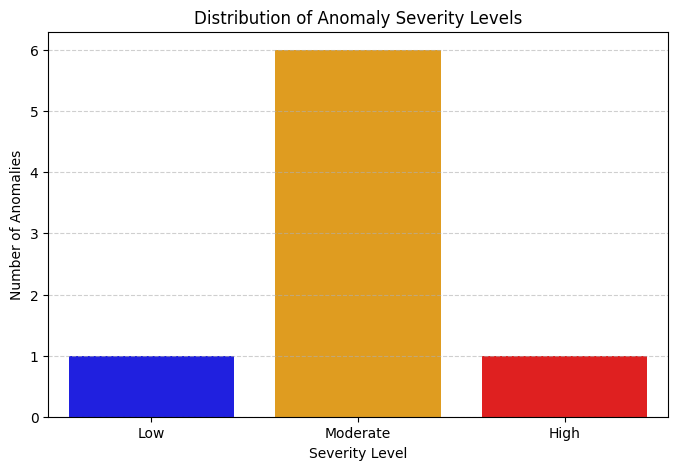

🔎 **Anomaly Severity Summary:**


,DateTime,Total_Hourly_Consumption,anomaly_score,Severity
7,2013-12-28,24.584,1.957673,High
1,2012-12-21,20.402,0.568724,Moderate
2,2013-02-21,19.687,0.331254,Moderate
0,2012-08-19,19.440,0.249219,Moderate
3,2013-03-24,17.414,-0.423668,Moderate
4,2013-05-25,16.595,-0.695679,Moderate
6,2013-10-27,16.088,-0.864066,Moderate
5,2013-07-26,15.307,-1.123457,Low


✅ Updated Anomaly Data Saved: /Users/anurag/Documents/EnergyGPT/data/processed/validated_anomalies_with_severity.csv


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load the Refined Anomaly Dataset
anomaly_data_path = "/Users/anurag/Documents/EnergyGPT/data/processed/validated_anomalies.csv"
df_anomalies = pd.read_csv(anomaly_data_path)

# ✅ Ensure "Total_Hourly_Consumption" exists
if "Total_Hourly_Consumption" not in df_anomalies.columns:
    raise ValueError("❌ 'Total_Hourly_Consumption' column not found. Check the dataset!")

# ✅ Compute Z-score for Anomaly Scoring
df_anomalies["anomaly_score"] = (df_anomalies["Total_Hourly_Consumption"] - 
                                 df_anomalies["Total_Hourly_Consumption"].mean()) / df_anomalies["Total_Hourly_Consumption"].std()

# ✅ Define Severity Categories
df_anomalies["Severity"] = pd.cut(
    df_anomalies["anomaly_score"],
    bins=[-float("inf"), -1, 1, float("inf")],  # Adjust thresholds as needed
    labels=["Low", "Moderate", "High"]
)

# ✅ Count Severity Levels
severity_counts = df_anomalies["Severity"].value_counts()

# 🔥 Plot Severity Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette=["blue", "orange", "red"])
plt.title("Distribution of Anomaly Severity Levels")
plt.xlabel("Severity Level")
plt.ylabel("Number of Anomalies")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# ✅ Display refined anomalies with severity
print("🔎 **Anomaly Severity Summary:**")
display(df_anomalies[["DateTime", "Total_Hourly_Consumption", "anomaly_score", "Severity"]].sort_values(by="anomaly_score", ascending=False))

# ✅ Save the updated dataset with severity levels
updated_anomaly_data_path = "/Users/anurag/Documents/EnergyGPT/data/processed/validated_anomalies_with_severity.csv"
df_anomalies.to_csv(updated_anomaly_data_path, index=False)
print(f"✅ Updated Anomaly Data Saved: {updated_anomaly_data_path}")


<Figure size 1000x500 with 0 Axes>

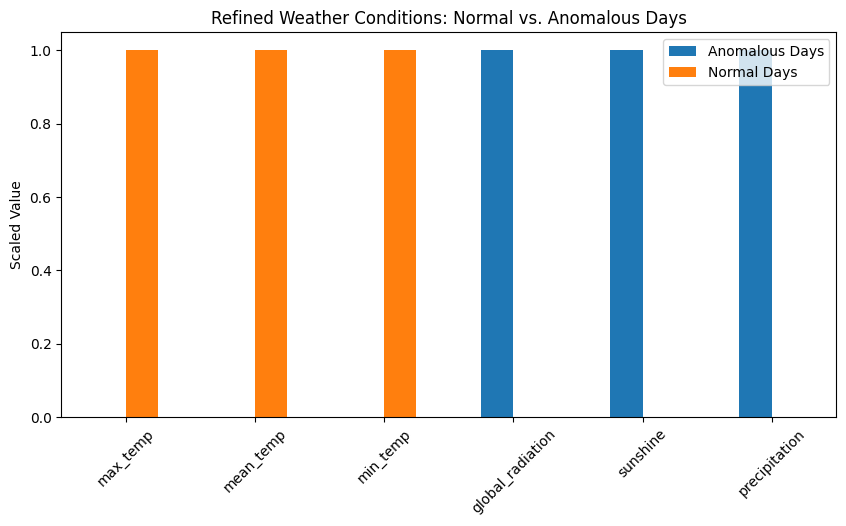

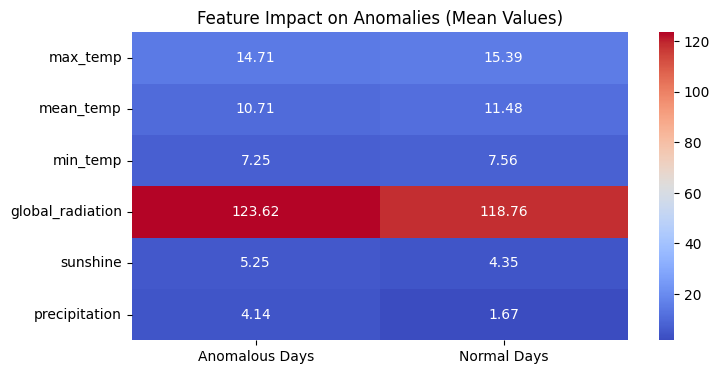

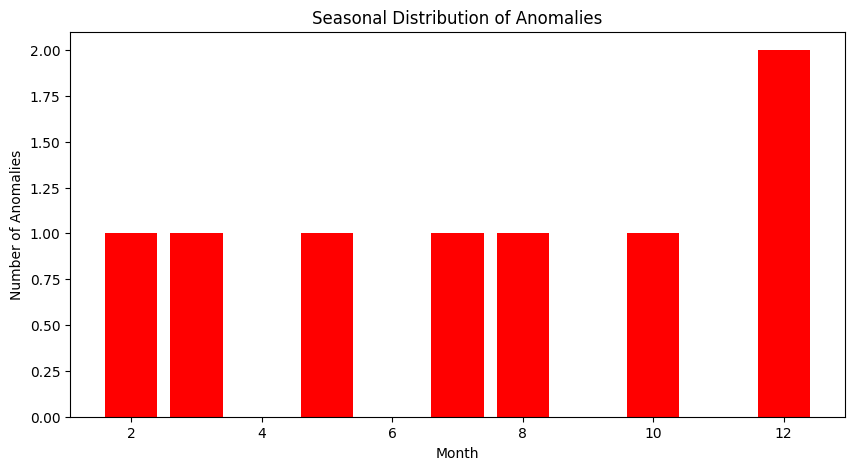

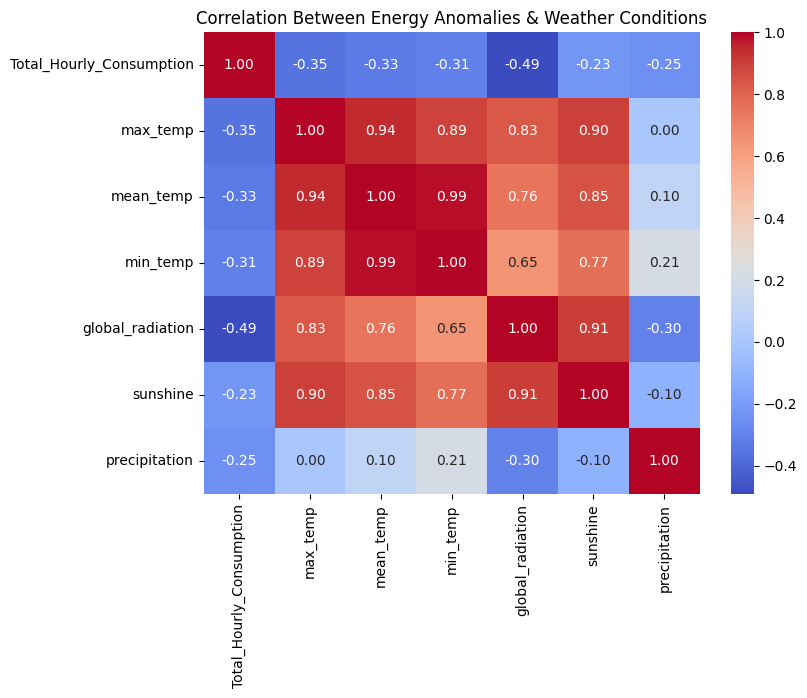

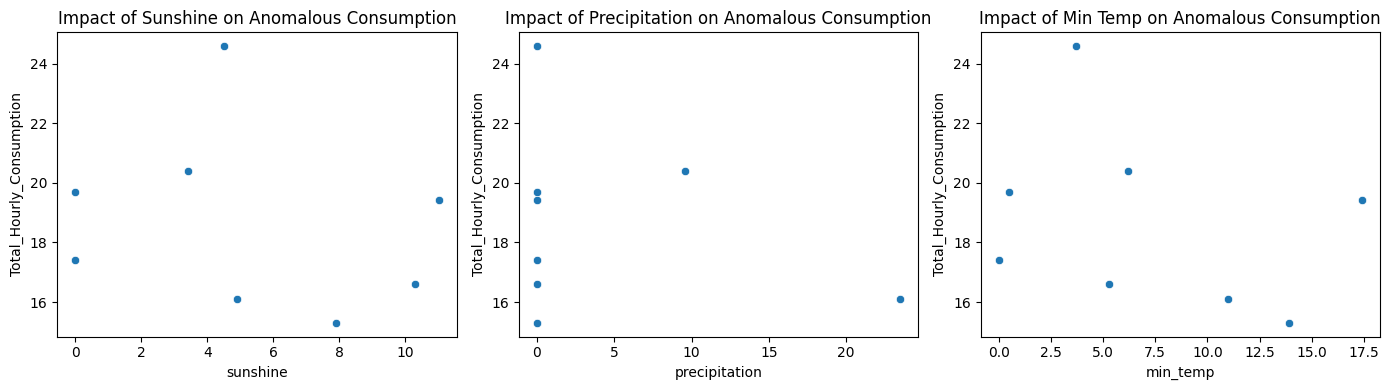

✅ Correlation matrix saved at: /Users/anurag/Documents/EnergyGPT/outputs/weather_energy_correlation.csv

✅ Visualizations & Analysis Completed!


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load validated anomalies dataset
anomalies_path = "/Users/anurag/Documents/EnergyGPT/data/processed/validated_anomalies.csv"
df_anomalous = pd.read_csv(anomalies_path, parse_dates=["DateTime"])

# Load normal days dataset
normal_data_path = "/Users/anurag/Documents/EnergyGPT/data/raw/london_weather.csv"
df_normal = pd.read_csv(normal_data_path, parse_dates=["date"])  # Ensure correct date parsing

# Rename "date" to "DateTime" in df_normal for consistency
df_normal.rename(columns={"date": "DateTime"}, inplace=True)

# Select relevant weather features
weather_features = ["max_temp", "mean_temp", "min_temp", "global_radiation", "sunshine", "precipitation"]

# Compute Mean Values for Both Categories
weather_summary = pd.DataFrame({
    "Anomalous Days": df_anomalous[weather_features].mean(),
    "Normal Days": df_normal[weather_features].mean()
})

# 🔹 Normalize Data for Fair Scaling
scaler = MinMaxScaler()
weather_summary_scaled = pd.DataFrame(
    scaler.fit_transform(weather_summary.T).T,  # Normalize per column
    columns=weather_summary.columns,
    index=weather_summary.index
)

# ✅ Plot Bar Chart Comparison
plt.figure(figsize=(10, 5))
weather_summary_scaled.plot(kind="bar", figsize=(10, 5))
plt.title("Refined Weather Conditions: Normal vs. Anomalous Days")
plt.ylabel("Scaled Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# ✅ Heatmap Visualization for Feature Impact
plt.figure(figsize=(8, 4))
sns.heatmap(weather_summary, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Impact on Anomalies (Mean Values)")
plt.show()

# 🔹 Seasonal Analysis: Distribution of Anomalies by Month
df_anomalous["month"] = df_anomalous["DateTime"].dt.month
monthly_anomaly_counts = df_anomalous["month"].value_counts().sort_index()

# ✅ Plot Monthly Anomaly Distribution
plt.figure(figsize=(10, 5))
plt.bar(monthly_anomaly_counts.index, monthly_anomaly_counts.values, color="red")
plt.xlabel("Month")
plt.ylabel("Number of Anomalies")
plt.title("Seasonal Distribution of Anomalies")
plt.show()

# 🔹 Correlation Analysis
corr_matrix = df_anomalous[["Total_Hourly_Consumption"] + weather_features].corr()

# ✅ Heatmap for Correlation Between Weather & Energy Anomalies
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Energy Anomalies & Weather Conditions")
plt.show()

# 🔹 Scatter Plots: Individual Feature Impact on Energy Consumption
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.scatterplot(x=df_anomalous["sunshine"], y=df_anomalous["Total_Hourly_Consumption"], ax=axes[0])
axes[0].set_title("Impact of Sunshine on Anomalous Consumption")

sns.scatterplot(x=df_anomalous["precipitation"], y=df_anomalous["Total_Hourly_Consumption"], ax=axes[1])
axes[1].set_title("Impact of Precipitation on Anomalous Consumption")

sns.scatterplot(x=df_anomalous["min_temp"], y=df_anomalous["Total_Hourly_Consumption"], ax=axes[2])
axes[2].set_title("Impact of Min Temp on Anomalous Consumption")

plt.tight_layout()
plt.show()

# ✅ Save correlation matrix for reference
corr_output_path = "/Users/anurag/Documents/EnergyGPT/outputs/weather_energy_correlation.csv"
corr_matrix.to_csv(corr_output_path)

print(f"✅ Correlation matrix saved at: {corr_output_path}")
print("\n✅ Visualizations & Analysis Completed!")
